In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
uploaded = files.upload()

Saving container.csv to container.csv


In [8]:
data = pd.read_csv('container.csv')

print("the Container Dataset successful")

the Container Dataset successful


In [27]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Location Status'] = label_encoder.fit_transform(data['Location Status'])


In [28]:
features = data[['Container Size', 'Area', 'Row', 'Bay', 'Level']]
labels = data['Location Status']


In [35]:
# Perform one-hot encoding on categorical columns
categorical_columns = ['Area', 'Bay']
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = onehot_encoder.fit_transform(features[categorical_columns])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
# Get the categories for the one-hot encoded columns
encoded_categories = onehot_encoder.categories_
encoded_feature_names = []
for i, col in enumerate(categorical_columns):
    for category in encoded_categories[i][1:]:  # Drop first category due to drop='first'
        encoded_feature_names.append(f"{col}_{category}")


In [37]:
encoded_features_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
features_encoded = pd.concat([features.drop(categorical_columns, axis=1), encoded_features_df], axis=1)



In [39]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    features_encoded, labels, test_size=0.2, random_state=42
)


In [40]:
# Standardize numerical features
scaler = StandardScaler()
X_class_train_scaled = scaler.fit_transform(X_class_train)
X_class_test_scaled = scaler.transform(X_class_test)


In [45]:
# Calculate the maximum sequence length
max_sequence_length = max(len(seq) for seq in X_class_train_scaled)
print("Maximum Sequence Length:", max_sequence_length)


Maximum Sequence Length: 19


In [52]:
X_class_train_padded = np.array([np.pad(seq, [(0, max_sequence_length - len(seq))], mode='constant') for seq in X_class_train_scaled])
X_class_test_padded = np.array([np.pad(seq, [(0, max_sequence_length - len(seq))], mode='constant') for seq in X_class_test_scaled])


In [54]:
# Build the LSTM classification model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_class_train_scaled.shape[1]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [57]:
#Train the model
model.fit(X_class_train_scaled, y_class_train, epochs=25, batch_size=16, validation_data=(X_class_test_scaled, y_class_test))


Epoch 1/25
175/175 [==============================] - 0s 3ms/step - loss: 0.2685 - accuracy: 0.8907 - val_loss: 0.3033 - val_accuracy: 0.8600
Epoch 2/25
175/175 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8896 - val_loss: 0.3011 - val_accuracy: 0.8643
Epoch 3/25
175/175 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.8879 - val_loss: 0.3012 - val_accuracy: 0.8600
Epoch 4/25
175/175 [==============================] - 0s 2ms/step - loss: 0.2582 - accuracy: 0.8904 - val_loss: 0.3028 - val_accuracy: 0.8629
Epoch 5/25
175/175 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.8954 - val_loss: 0.2974 - val_accuracy: 0.8643
Epoch 6/25
175/175 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.8896 - val_loss: 0.3005 - val_accuracy: 0.8586
Epoch 7/25
175/175 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.8904 - val_loss: 0.3004 - val_accuracy: 0.8657
Epoch 

In [64]:
# Build the regression model
regression_model = Sequential()
regression_model.add(Dense(64, activation='relu', input_dim=features_encoded.shape[1]))  # Adjust input_dim accordingly
regression_model.add(Dense(1))  # Output layer for regression
regression_model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [67]:
# Train the regression model
regression_model.fit(features_encoded, labels, epochs=32, batch_size=16, validation_split=0.2)

Epoch 1/32
175/175 [==============================] - 1s 6ms/step - loss: 0.1030 - val_loss: 0.5411
Epoch 2/32
175/175 [==============================] - 0s 3ms/step - loss: 0.1042 - val_loss: 0.7517
Epoch 3/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1068 - val_loss: 0.5142
Epoch 4/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1040 - val_loss: 0.5773
Epoch 5/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1072 - val_loss: 0.5211
Epoch 6/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1065 - val_loss: 0.5521
Epoch 7/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1034 - val_loss: 0.6498
Epoch 8/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1076 - val_loss: 0.7927
Epoch 9/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1045 - val_loss: 0.5385
Epoch 10/32
175/175 [==============================] - 0s 2ms/step - loss: 0.1070 - val_loss: 0.6814

In [68]:
def optimize_placement(regression_predictions):
    # Assuming regression_predictions is a NumPy array of predictions
    # Predicted values of Area, Row, Bay, and Level
    predicted_area = regression_predictions[0]
    predicted_row = regression_predictions[1]
    predicted_bay = regression_predictions[2]
    predicted_level = regression_predictions[3]

    # Your optimization logic here
    # You mentioned the formula: optimized_placement = Area + Row + Bay + Level
    optimized_placement = predicted_area + predicted_row + predicted_bay + predicted_level

    return optimized_placement


In [71]:
def optimize_placement(regression_predictions):
    # Your optimization logic here
    optimized_placement = np.sum(regression_predictions)  # Sum of all predicted values
    return optimized_placement

# After training the regression model and getting predictions
regression_predictions = regression_model.predict(features_encoded)

# Call the optimization function
optimized_placement = optimize_placement(regression_predictions)
print("Optimized Placement:", optimized_placement)

110/110 [==============================] - 0s 2ms/step
Optimized Placement: 2599.2122


In [80]:
# After training the regression model and getting predictions
regression_predictions = regression_model.predict(features_encoded)

# Call the optimization function for all predictions
optimized_placements = [optimize_placement(prediction) for prediction in regression_predictions]


110/110 [==============================] - 0s 3ms/step


In [84]:
# Randomly sample a subset of data points for plotting
subset_size = 100  # Adjust the number of data points you want to plot
random_indices = np.random.choice(len(features), size=subset_size, replace=False)
subset_features = features.iloc[random_indices]
subset_optimized_placements = [optimized_placements[i] for i in random_indices]


<ipython-input-85-c352f2ca6899>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Add this line for better layout


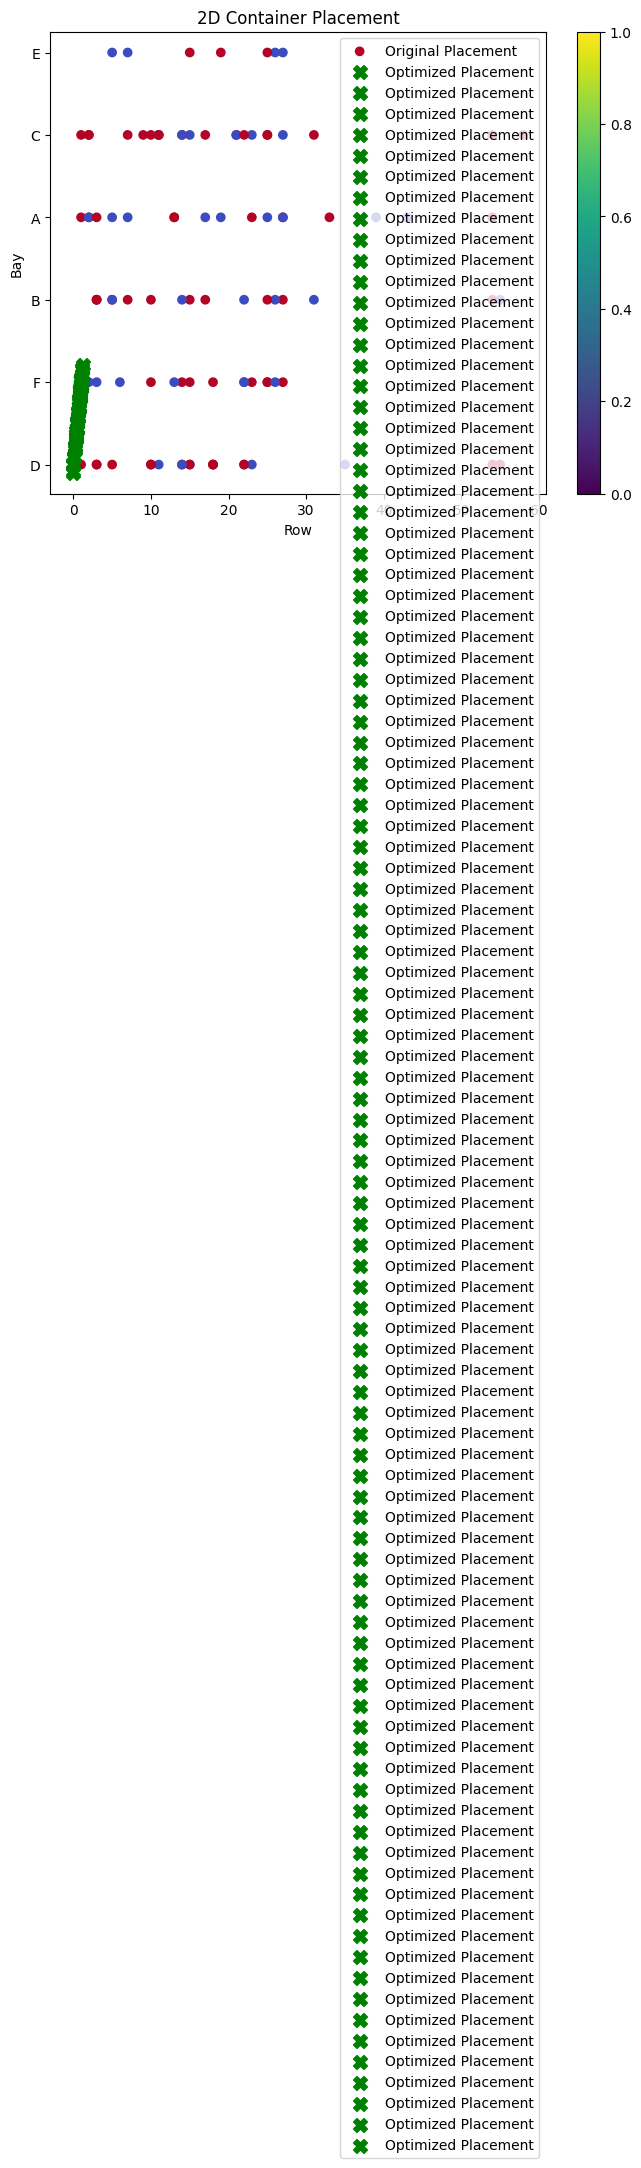

In [85]:
# Plot the 2D placement with the subset
plt.figure(figsize=(8, 6))
plt.scatter(subset_features['Row'], subset_features['Bay'], c=labels[random_indices], cmap='coolwarm', label='Original Placement')
for optimized_placement in subset_optimized_placements:
    plt.scatter(optimized_placement, optimized_placement, c='green', marker='X', s=100, label='Optimized Placement')
plt.xlabel('Row')
plt.ylabel('Bay')
plt.title('2D Container Placement')
plt.colorbar()
plt.legend()
plt.tight_layout()  # Add this line for better layout
plt.show()

ValueError: ignored

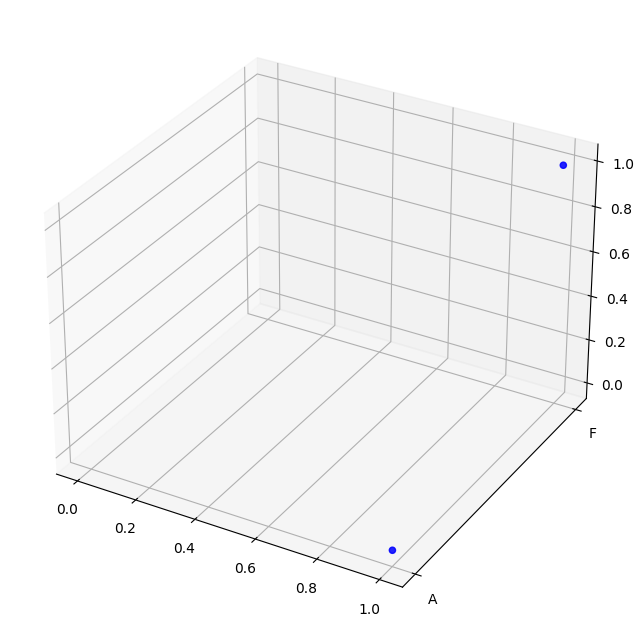

In [88]:
# Randomly sample a subset of data points for plotting
subset_size = 100  # Adjust the number of data points you want to plot
random_indices = np.random.choice(len(features), size=subset_size, replace=False)
subset_features = features.iloc[random_indices]
subset_optimized_placements = [optimized_placements[i] for i in random_indices]

# Plot the 3D placement with the subset
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Original placement
ax.scatter(subset_features['Row'], subset_features['Bay'], labels[random_indices], c='blue', marker='o', label='Original Placement')

# Optimized placement
for optimized_placement in subset_optimized_placements:
    ax.scatter(optimized_placement[1], optimized_placement[2], optimized_placement[3], c='green', marker='X', s=100, label='Optimized Placement')

ax.set_xlabel('Row')
ax.set_ylabel('Bay')
ax.set_zlabel('Optimized Placement')
ax.set_title('3D Container Placement')
ax.legend()
plt.tight_layout()  # Add this line for better layout
plt.show()



